# CMSC 320 FINAL PROJECT - SRIKET KOMALI AND KHOA HUYNH






### How often do lottery draft picks in the NBA pan out?

## Motivation
Basketball is a multi-billion dollar sport with fans across the entire world. Many players work hard every single day to earn a chance to not just make it to the NBA, but have a long career in the NBA to earn money for their family. It is imperative that the best talent is getting selected into the NBA to help reward players who put their life into basketball. By looking at how often lottery picks have played in the past, we get a sense of understanding of how succesful teams have been in selecting talent. This would help us select new and the successful talent for future drafts.

In this project, we taking a look at database dealing with the NBA(National Basketball Association.) There are 30 teams in the NBA. Every year, most NBA teams participate in an event called the draft. During the Draft, NBA teams select upcoming talent that they think will benefit their organizations the most. The draft consists of 2 rounds, where 30 players are selected each round. The order of what team gets to select in the NBA draft lottery. The NBA draft lottery consists of the teams that failed to make it to the playoffs the previous season. The worse the performance of the team, the higher the probability they will have a higher pick in the NBA draft lottery. The top 4 picks are granted to the 4 worst teams in form of a random probability. The rest of the picks are ordered from inverse-order of the worst records from the previous season. The NBA lottery is defined as the top 14 picks of the NBA draft. If a player gets selected in the first 15 picks of the draft, they are considered a lottery pick. 

We want to look how successful the players that get selected in the lottery go out to be. Do lottery picks often pan out to the potential that they were once viewed as? 

#Data Collection

In [ ]:
#1A Data collection
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import json
from collections import Counter

from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api as sm


In [ ]:
link = "http://data.nba.net/10s/prod/v1/2021/players.json"
req = requests.get(link)
raw_data = req.json()
player_data = raw_data["league"]["standard"]
players = []
# HERE WE ARE CREATING A DATAFRAME WITH ALL THE NBA PLAYER ATTRIBUTES WE ARE INTERESTED IN BY GOING THROUGH
#RAW DATA
for player in player_data:
    players.append(
    {
        "firstName": player["firstName"],
        "lastName": player["lastName"],
        "Player" : player["firstName"] +" "+ player["lastName"],
        "pos": player["pos"],
        "heightFeet": int(player["heightFeet"]) if not player["heightFeet"] == "-" else "",
        "heightInches": int(player["heightInches"]) if not player["heightInches"] == "-" else "",
        "heightTotal": player["heightFeet"] + " " + player["heightInches"],
        "weightPounds": int(player["weightPounds"]) if not player["weightPounds"] == "" else "",
        "nbaDebutYear": player["nbaDebutYear"],
        "collegeName": player["collegeName"],
        "country": player["country"],
        "roundNum": int(player["draft"]["roundNum"]) if not player["draft"]["roundNum"] == "" else "",
        "pickNum": int(player["draft"]["pickNum"]) if not player["draft"]["pickNum"] == "" else "",
        "draftYear": int(player["draft"]["seasonYear"]) if not player["draft"]["seasonYear"] == "" else "",
        "teamId": player["draft"]["teamId"]
    })

nba_df = pd.DataFrame(players)
nba_df.head(50)

,firstName,lastName,Player,pos,heightFeet,heightInches,heightTotal,weightPounds,nbaDebutYear,collegeName,country,roundNum,pickNum,draftYear,teamId
0,Precious,Achiuwa,Precious Achiuwa,F,6,8,6 8,225,2020,Memphis,Nigeria,1,20,2020,1610612748
1,Steven,Adams,Steven Adams,C,6,11,6 11,265,2013,Pittsburgh,New Zealand,1,12,2013,1610612760
2,Bam,Adebayo,Bam Adebayo,C-F,6,9,6 9,255,2017,Kentucky,USA,1,14,2017,1610612748
3,Santi,Aldama,Santi Aldama,F-C,6,11,6 11,215,2021,Loyola-Maryland,Spain,1,30,2021,1610612762
4,LaMarcus,Aldridge,LaMarcus Aldridge,C-F,6,11,6 11,250,2006,Texas-Austin,USA,1,2,2006,1610612741
5,Nickeil,Alexander-Walker,Nickeil Alexander-Walker,G,6,5,6 5,205,2019,Virginia Tech,Canada,1,17,2019,1610612751
6,Grayson,Allen,Grayson Allen,G,6,4,6 4,198,2018,Duke,USA,1,21,2018,1610612762
7,Jarrett,Allen,Jarrett Allen,C,6,10,6 10,243,2017,Texas-Austin,USA,1,22,2017,1610612751
8,Jose,Alvarado,Jose Alvarado,G,6,0,6 0,179,2021,Georgia Tech,USA,,,,
9,Kyle,Anderson,Kyle Anderson,F-G,6,9,6 9,230,2014,UCLA,USA,1,30,2014,1610612759


In [ ]:
nba_df.drop('firstName', inplace=True, axis=1)
nba_df.drop('lastName', inplace=True, axis=1)
nba_df['heightInches'] = nba_df["heightFeet"] * 12 + nba_df["heightInches"]
# nba_df.rename(columns = {"HeightFeet": "Height(inches)"}, inplace = True)
nba_df.drop('heightFeet', inplace=True, axis=1)
# nba_df.drop('heightInches', inplace=True, axis=1)

nba_df.head(50)

,Player,pos,heightInches,heightTotal,weightPounds,nbaDebutYear,collegeName,country,roundNum,pickNum,draftYear,teamId
0,Precious Achiuwa,F,80,6 8,225,2020,Memphis,Nigeria,1,20,2020,1610612748
1,Steven Adams,C,83,6 11,265,2013,Pittsburgh,New Zealand,1,12,2013,1610612760
2,Bam Adebayo,C-F,81,6 9,255,2017,Kentucky,USA,1,14,2017,1610612748
3,Santi Aldama,F-C,83,6 11,215,2021,Loyola-Maryland,Spain,1,30,2021,1610612762
4,LaMarcus Aldridge,C-F,83,6 11,250,2006,Texas-Austin,USA,1,2,2006,1610612741
5,Nickeil Alexander-Walker,G,77,6 5,205,2019,Virginia Tech,Canada,1,17,2019,1610612751
6,Grayson Allen,G,76,6 4,198,2018,Duke,USA,1,21,2018,1610612762
7,Jarrett Allen,C,82,6 10,243,2017,Texas-Austin,USA,1,22,2017,1610612751
8,Jose Alvarado,G,72,6 0,179,2021,Georgia Tech,USA,,,,
9,Kyle Anderson,F-G,81,6 9,230,2014,UCLA,USA,1,30,2014,1610612759


In [ ]:
nba_df.describe()

,Player,pos,heightInches,heightTotal,weightPounds,nbaDebutYear,collegeName,country,roundNum,pickNum,draftYear,teamId
count,592,592,592,592,592,592,592,592,592,592,592,592
unique,592,8,20,20,94,21,193,46,4,60,21,31
top,Precious Achiuwa,G,,- -,,2021,,USA,1,,,
freq,1,201,86,86,86,105,34,430,284,176,169,177


In [ ]:
# this block gets rid of all extraneous information that is not needed for our analysis
for i, row in nba_df.iterrows():
    def convert_to_none(col):
        colName = row[col]
        if not colName:
            nba_df.at[i, col] = "None"
    def convert_to_zero(col):
        colName = row[col]
        if not colName:
            nba_df.at[i, col] = 0
            
    convert_to_none("collegeName")
    convert_to_none("draftYear")
    convert_to_none("nbaDebutYear")
    convert_to_zero("pickNum")
    convert_to_zero("roundNum")
nba_df.head(500)

,Player,pos,heightInches,heightTotal,weightPounds,nbaDebutYear,collegeName,country,roundNum,pickNum,draftYear,teamId
0,Precious Achiuwa,F,80,6 8,225,2020,Memphis,Nigeria,1,20,2020,1610612748
1,Steven Adams,C,83,6 11,265,2013,Pittsburgh,New Zealand,1,12,2013,1610612760
2,Bam Adebayo,C-F,81,6 9,255,2017,Kentucky,USA,1,14,2017,1610612748
3,Santi Aldama,F-C,83,6 11,215,2021,Loyola-Maryland,Spain,1,30,2021,1610612762
4,LaMarcus Aldridge,C-F,83,6 11,250,2006,Texas-Austin,USA,1,2,2006,1610612741
...,...,...,...,...,...,...,...,...,...,...,...,...
495,James Wiseman,C,84,7 0,240,2020,Memphis,USA,1,2,2020,1610612744
496,Christian Wood,F,81,6 9,214,2015,UNLV,USA,0,0,None,
497,Robert Woodard II,F,78,6 6,235,2020,Mississippi State,USA,2,40,2020,1610612763
498,Delon Wright,G,77,6 5,185,2015,Utah,USA,1,20,2015,1610612761


In [ ]:
# I imported data from the Basketball reference 
# This gives me every players statistics per game
url = "https://www.basketball-reference.com/leagues/NBA_2022_per_game.html"
r1 = requests.get(url)
root1 = BeautifulSoup(r1.content)
lnks1 = root1.find('table')
pretty1 = lnks1.prettify()
table1 = pd.read_html(pretty1)
stats = table1[0]
stats.head(100)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,75,Greg Brown III,SF,20,POR,48,6,13.3,1.7,4.0,...,.677,0.8,2.0,2.8,0.7,0.5,0.5,0.8,1.9,4.7
96,76,Jaylen Brown,SF,25,BOS,66,66,33.6,8.7,18.4,...,.758,0.8,5.3,6.1,3.5,1.1,0.3,2.7,2.5,23.6
97,77,Moses Brown,C,22,TOT,40,6,8.6,1.6,2.7,...,.597,1.0,2.4,3.4,0.0,0.2,0.4,0.5,1.3,4.3
98,77,Moses Brown,C,22,DAL,26,1,6.5,1.0,1.9,...,.628,0.6,1.7,2.3,0.0,0.1,0.3,0.5,1.1,3.1


In [ ]:
stats.drop(stats[stats.Rk == 'Rk'].index, inplace=True)
# This data set repeats the headings in the data set, so those rows are dropped

counter = Counter(stats['Player'])
for player in counter:
    if counter[player] > 1:
        stats.drop(stats[(stats['Player'] == player) & (stats['Tm'] != 'TOT')].index, inplace=True)
        # Players who appear for multiple teams have all stats except their total stats dropped
stats.head(100)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,96,Wendell Carter Jr.,PF,22,ORL,62,61,29.9,5.8,11.0,...,.691,2.2,8.2,10.5,2.8,0.6,0.7,1.9,2.7,15.0
124,97,Alex Caruso,SG,27,CHI,41,18,28.0,2.5,6.2,...,.795,0.8,2.8,3.6,4.0,1.7,0.4,1.4,2.6,7.4
125,98,Willie Cauley-Stein,C,28,TOT,20,2,9.2,0.8,1.8,...,.500,0.7,1.4,2.0,0.5,0.3,0.2,0.4,1.0,1.7
128,99,Ahmad Caver,SG,25,IND,1,0,1.0,1.0,1.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
final_dataset = pd.merge(nba_df, stats, how = 'inner', on = 'Player')
final_dataset.head(50)
final_dataset['pickNum'] = pd.to_numeric(final_dataset['pickNum'])
final_dataset['PTS'] = pd.to_numeric(final_dataset['PTS'])
khoa_copy = final_dataset.copy()

In [ ]:
# This dataframe holds all the lottery nba players that are in the nba currently
lottery = final_dataset.loc[(final_dataset["pickNum"] <= 14) & (final_dataset["roundNum"] == 1) & (final_dataset["roundNum"] != 0)]
lottery.drop('ORB', inplace=True, axis=1)
lottery.drop('DRB', inplace=True, axis=1)
lottery.drop('PF', inplace=True, axis=1)
lottery.drop('2P', inplace=True, axis=1)
lottery.drop('2PA', inplace=True, axis=1)
lottery.drop('2P%', inplace=True, axis=1)
lottery.head(50)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Player,pos,heightInches,heightTotal,weightPounds,nbaDebutYear,collegeName,country,roundNum,pickNum,...,eFG%,FT,FTA,FT%,TRB,AST,STL,BLK,TOV,PTS
1,Steven Adams,C,83,6 11,265,2013,Pittsburgh,New Zealand,1,12,...,.547,1.4,2.6,.543,10.0,3.4,0.9,0.8,1.5,6.9
2,Bam Adebayo,C-F,81,6 9,255,2017,Kentucky,USA,1,14,...,.557,4.6,6.1,.753,10.1,3.4,1.4,0.8,2.6,19.1
4,LaMarcus Aldridge,C-F,83,6 11,250,2006,Texas-Austin,USA,1,2,...,.566,1.9,2.2,.873,5.5,0.9,0.3,1.0,0.9,12.9
12,Carmelo Anthony,F,79,6 7,238,2003,Syracuse,USA,1,3,...,.544,1.9,2.3,.830,4.2,1.0,0.7,0.8,0.9,13.3
16,D.J. Augustin,G,71,5 11,183,2008,Texas-Austin,USA,1,9,...,.577,0.7,0.8,.884,1.2,1.9,0.3,0.0,1.0,5.3
17,Deni Avdija,F,81,6 9,210,2020,Maccabi Tel Aviv,Israel,1,9,...,.503,1.3,1.7,.757,5.2,2.0,0.7,0.5,1.1,8.4
18,Deandre Ayton,C,83,6 11,250,2018,Arizona,Bahamas,1,1,...,.639,1.8,2.4,.746,10.2,1.4,0.7,0.7,1.6,17.2
20,Marvin Bagley III,F,83,6 11,235,2018,Duke,USA,1,2,...,.530,1.4,2.1,.663,7.0,0.8,0.5,0.4,0.8,11.3
21,LaMelo Ball,G,79,6 7,180,2020,Illawarra,USA,1,3,...,.517,2.8,3.2,.872,6.7,7.6,1.6,0.4,3.3,20.1
22,Lonzo Ball,G,78,6 6,190,2017,UCLA,USA,1,2,...,.567,0.6,0.8,.750,5.4,5.1,1.8,0.9,2.3,13.0


## How many lottery picks are still in the NBA? 

In [ ]:
number_of_lottery = len(lottery)

In [ ]:
total_nba_players = len(final_dataset)

In [ ]:
non_lottery = total_nba_players - number_of_lottery

In [ ]:
number_of_lottery/total_nba_players

0.2909441233140655

Roughly 30% of the NBA players that have been rostered are lottery picks. Since alot of players get waived,
We can assume that this percentage can be alittle higher. 

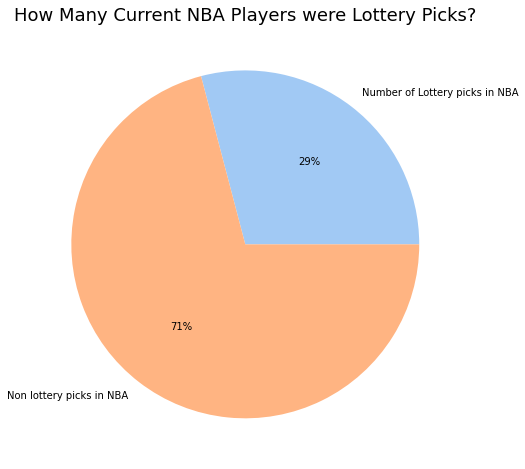

In [ ]:
data = [number_of_lottery, non_lottery]
labels = ['Number of Lottery picks in NBA', 'Non lottery picks in NBA']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(20, 8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("How Many Current NBA Players were Lottery Picks?", fontsize=18)
plt.show()

In [ ]:
lottery = lottery[lottery['3P%'].notna()]
lottery['3P'] = pd.to_numeric(lottery['3P'])
lottery['3PA'] = pd.to_numeric(lottery['3PA'])
lottery['3P%'] = pd.to_numeric(lottery['3P%'])
final_dataset['pickNum'] = pd.to_numeric(final_dataset['pickNum'])
final_dataset['PTS'] = pd.to_numeric(final_dataset['PTS'])



<ipython-input-315-d0a21513353f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lottery['3P'] = pd.to_numeric(lottery['3P'])
<ipython-input-315-d0a21513353f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lottery['3PA'] = pd.to_numeric(lottery['3PA'])
<ipython-input-315-d0a21513353f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

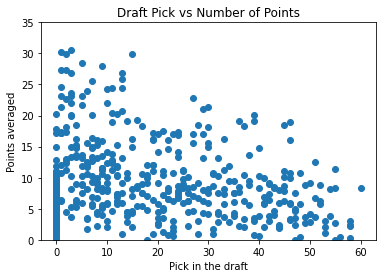

In [ ]:
plt.plot(final_dataset['pickNum'], final_dataset['PTS'], 'o')
plt.xlabel('Pick in the draft')
plt.ylabel('Points averaged')
plt.title('Draft Pick vs Number of Points')
plt.ylim([0,35])
#shows the range for how many points NBA players score; usually doesnt go over 35
plt.show()

This graph illustrates how many points NBA lottery draft picks score on average. Typically 10 points per game is considered a decent amount of points. Most of the lottery picks score above 12 points per game which is considered very good in basketball. There are about 10 lottery picks scoring over 25 points per game, which is considered excellent. That is estimated to about 1/4 of their teams points on a given night. It is also very visible that the lower the draft pick, the fewer amount of points that they score. But there is an interesting observation to be made here. From the 13th pick to the 30th pick, the graph remains stagnant. It is hard to draw a linear observation from that range of picks.It seems that toward to the end of the lottery to the end of the first round, NBA teams havent been succesful in determining talent. Another way to interpret this information is that non lottery first round picks might be drafted for role player potential. Instead of chosing players with the most potential to skyrocket, teams might chose players in the non-lottery first round for their instantly transferrable skills. Though the player has a low ceiling to become a great player, they might have potential to impact the game consistently. A good example is Grayson Allen. Grayson Allen was the 21st pick of the 2018 draft. He averages 11.1 points per game, which is considered average. Grayson Allen was a good 3 point shooter in college, and 3 point shooting is considered a transferable skill since shooting is the same at every level. Grayson Allen is a solid role player that does what he is supposed to do. 

Points is the only way to affect the game. Assists are another way. Assists occur when a player passes to another player, and a score is resulted directly from the pass. This is most common with guards. Lets see if this trend still holds up with assists. 

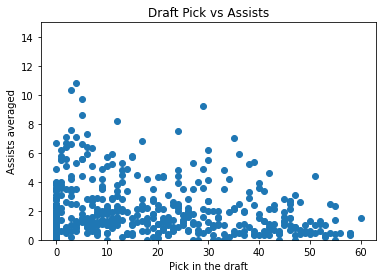

In [ ]:
final_dataset['AST'] = pd.to_numeric(final_dataset['AST'])
plt.plot(final_dataset['pickNum'], final_dataset['AST'], 'o')
plt.xlabel('Pick in the draft')
plt.ylabel('Assists averaged')
plt.title('Draft Pick vs Assists')
plt.ylim([0,15])
#shows the range for how many points NBA players score; usually doesnt go over 35
plt.show()

The previously noted trend for Points is even more prevalent in Assists. There is a steeper drop off between assists and what pick the player is drafted. We can infer that a player that has potential to assist is easier to determine than the ability to score points. 

Lets look at where the lottery talent comes from.

In [ ]:
by_origin_df = lottery.groupby(lottery["collegeName"]).count().reset_index()
by_origin_df = by_origin_df[["collegeName", "pickNum"]]
by_origin_df = by_origin_df.sort_values("pickNum", ascending=False)
by_origin_df.columns = ["College", "Count"]
sample = by_origin_df.head(20)
sample

,College,Count
27,Kentucky,14
14,Duke,11
57,Texas-Austin,7
22,Gonzaga,5
2,Arizona,5
26,Kansas,5
10,Connecticut,5
24,Indiana,4
58,UCLA,4
43,Oklahoma,3


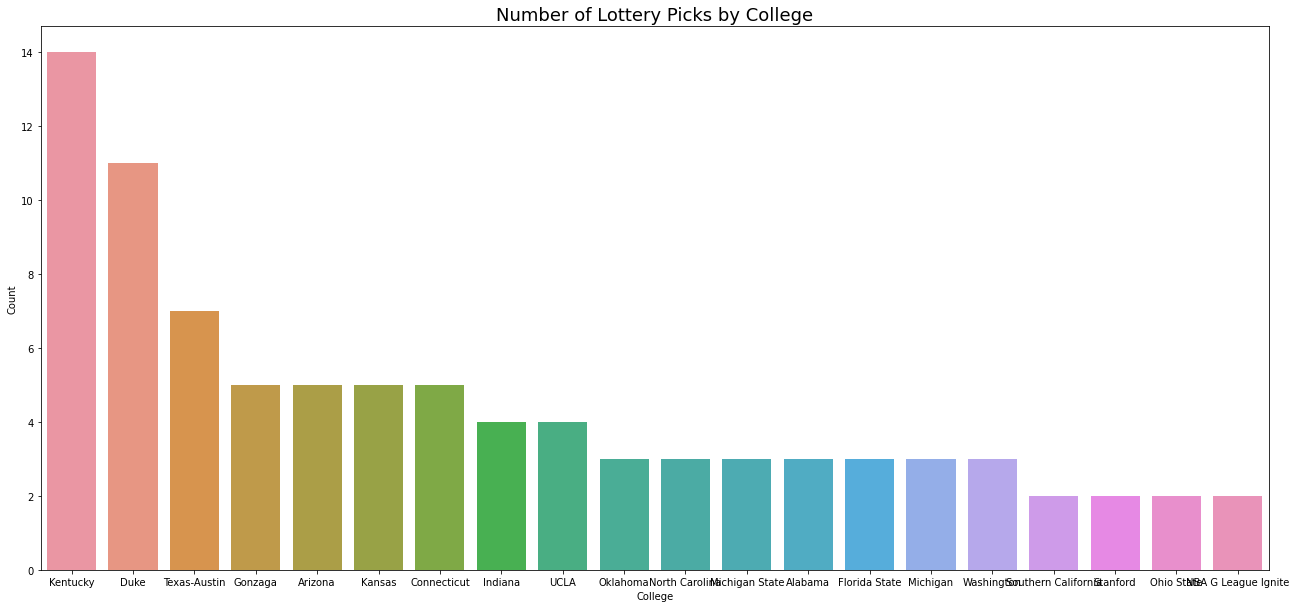

In [ ]:
plt.figure(figsize=(22,10))
plt.title("Number of Lottery Picks by College", fontsize=18)
sns.barplot(data=sample, x="College", y="Count")
plt.show()

This graph shows the top 20 colleges that produces the most lottery picks. We are only looking at top 20 colleges, because we dont to see all the other colleges that only produce one player. It is clearly evident that most lottery picks come from Kentucky and Duke. Kentucky and Duke are the only 2 colleges that have over 10 players that were selected in the lottery that remain in the NBA today. This makes sense as Duke and Kentucky are two of hte most coveted basketball programs of all time. Duke is coached by Coach Mike krzyzewski, and Kentucky is coached by John Calipari. The top highschool recruits and young talent are recruited by these 2 colleges, as they have a great track reckord for producing high-level players to the National basketball association, which is evident by the above graph. Another interesting observation is UNC-Chapel Hill, Kansas, Arizona, and Gonzaga. These are also big powerhouse basketball colleges, in which top recruits attend to further their basketball career. But they dont produce alot of of lottery picks. Im not sure quite why that is. 

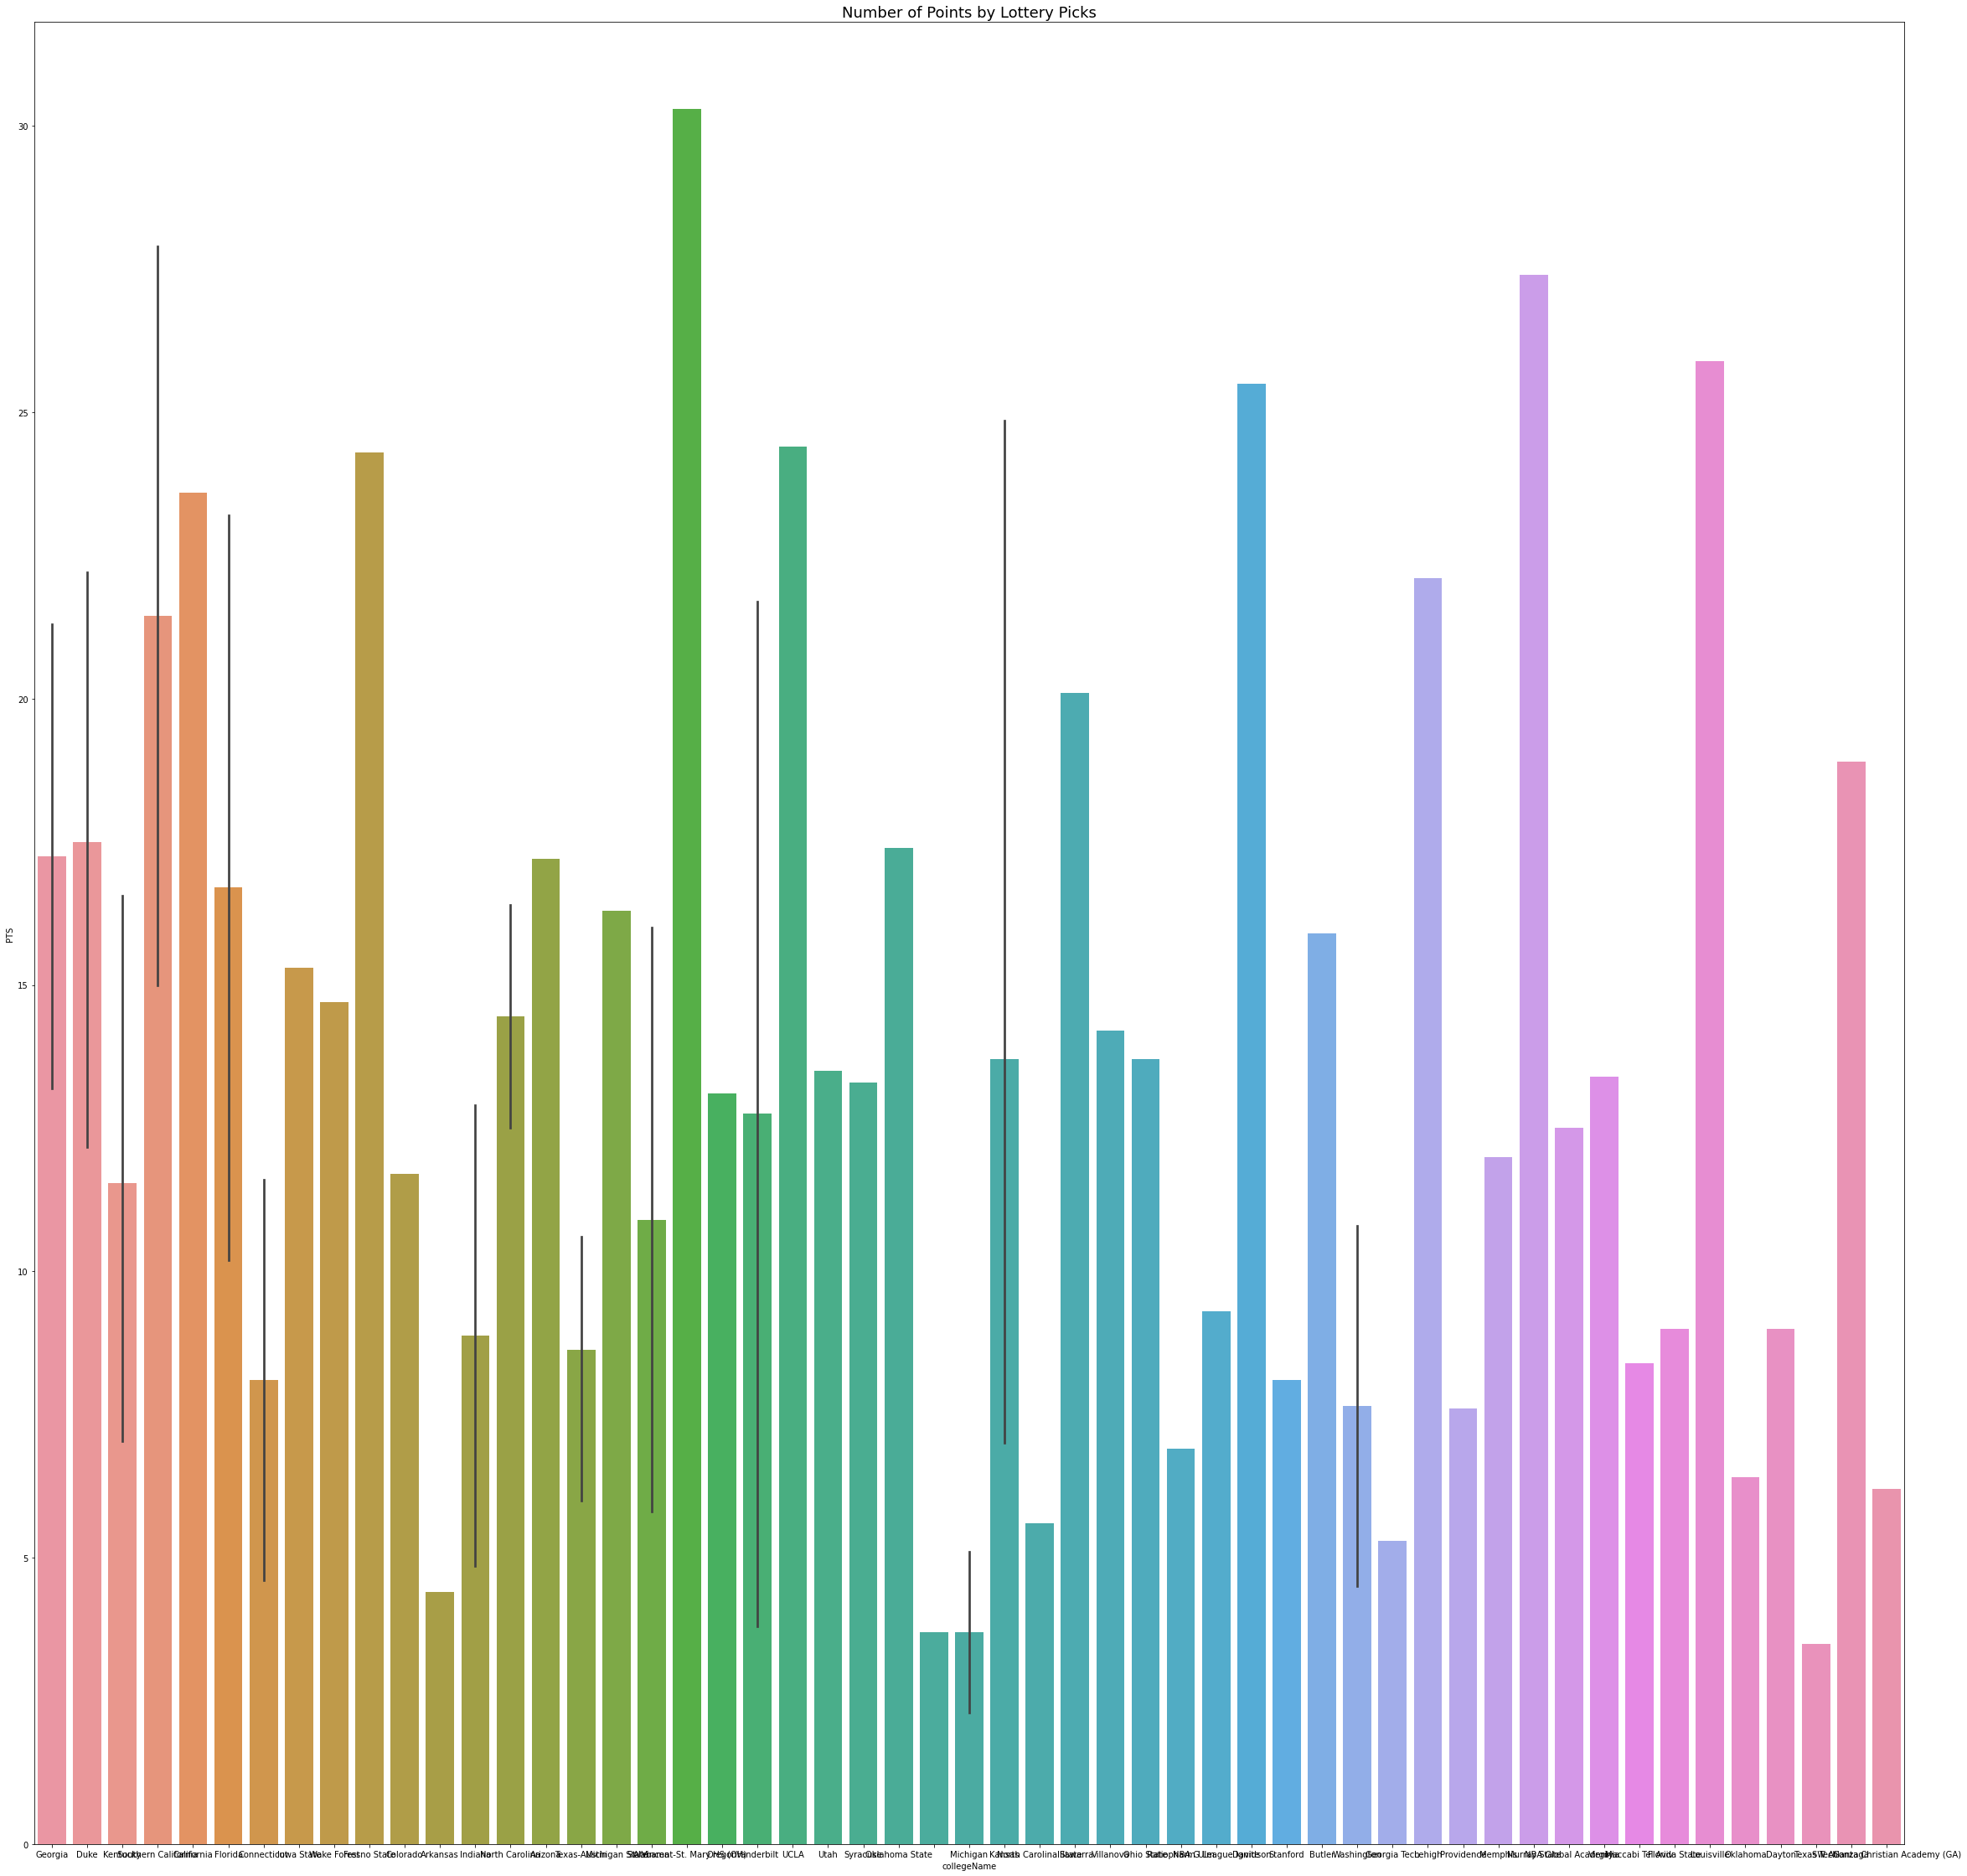

In [ ]:

plt.figure(figsize=(40,40))
plt.title("Number of Points by Lottery Picks", fontsize=18)
sns.barplot(data=lottery.sample(85), x="collegeName", y="PTS")
plt.show()

This graph now shows us how many points Lottery picks from Colleges score. From the last graph, we are expected to think Duke or Kentucky players are going to end up scoring the most. We think this cause of two reasons. The higher the draft pick, the more points you are going to score. Kentucky and Duke produces the most lottery draft picks. But when we look at this sample, this is actually not the case. We say Webers St, Davidson, and St. Vincent St Mary's at the top of hte list. We see Duke and Kentucky among the average. When looking at the players from those 3 schools, there has only been one player to attend each of those schools that are currently in hte NBA right now. Stephen Curry went to Davidson. Lebron James went to St. Vincent st. Mary's. Damian lillard went to Weber St. THose 3 players are some of the best players in the league and they were all lottery picks. It is interesting that they did not go to a powerhouse college such as Duke, Kentucky, or UNC chapel hill. We can draw an interesting observation from this. The best players in the NBA often went to smaller colleges. This isnt to say that players from big colleges dont end up doing well. They remain average. We can infer that going to big college power-house schools teach players to become good role players and stay in the NBA a long time. But extraoridnary success doesnt in the NBA doesnt really have a correlation to the college the player's attend to. 

# Analysis of Lottery Picks' Attributes
###What makes a player worthy of being drafted for the NBA?

There are many attributes a player may possess that make them more likely to get into the draft lottery.

To find out we will do a linear regression analysis on these attributes to determine if they play a role in a getting picked players. 


In [ ]:
# Making a copy to make modifications
attribute_dataset = final_dataset.copy()
# Droping the last 50 indivduals since they lack data on their height and weight
attribute_dataset.drop(attribute_dataset.tail(50).index,inplace=True)
# converting players attributes into numerical values
attribute_dataset['weightPounds'] = pd.to_numeric(attribute_dataset['weightPounds'])

# Center - 1
# Forward - 2
# Guard - 3
#Coverting positions from strings to numerical values
def convert_pos_to_num(pos):
    pos_str = pos[0]
    if pos_str == "G": #Guard
        return 3
    elif pos_str == "F": #Forward
        return 2
    elif pos_str == "C": #Center
        return 1
# USA = 1
# Other country = 0
# Converting players to either from the USA or not
def convert_country_to_num(country):
    if country == "USA":
        return 1
    else:
        return 0
attribute_dataset.loc[:, "country"] = attribute_dataset.loc[:, "country"].apply(convert_country_to_num)
attribute_dataset.loc[:, "pos"] = attribute_dataset.loc[:, "pos"].apply(convert_pos_to_num)
attribute_dataset

,Player,pos,heightInches,heightTotal,weightPounds,nbaDebutYear,collegeName,country,roundNum,pickNum,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,2,80,6 8,225,2020,Memphis,0,1,20,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,1,83,6 11,265,2013,Pittsburgh,0,1,12,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,1,81,6 9,255,2017,Kentucky,1,1,14,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,2,83,6 11,215,2021,Loyola-Maryland,0,1,30,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,1,83,6 11,250,2006,Texas-Austin,1,1,2,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Gabe York,3,75,6 3,190,2021,Arizona,1,0,0,...,.600,0.0,1.0,1.0,2.0,1.0,0.5,0.5,2.0,4.0
465,Thaddeus Young,2,80,6 8,235,2007,Georgia Tech,1,1,12,...,.469,1.5,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2
466,Trae Young,3,73,6 1,164,2018,Oklahoma,1,1,5,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
467,Omer Yurtseven,1,83,6 11,275,2021,Georgetown,0,0,0,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


In [ ]:
rating = attribute_dataset[["Player", "pickNum", "heightInches", "weightPounds", "pos", "country", "PTS"]]

rating.loc[:, "pickNum"] = 100 * (1 - ((rating["pickNum"] - 1) / rating["pickNum"].max()))
rating.loc[:, "heightInches"] = 100 * (rating["heightInches"] / rating["heightInches"].max())
rating.loc[:, "weightPounds"] = 100 * (rating["weightPounds"] / rating["weightPounds"].max())
rating.loc[:, "pos"] = 100 * (rating["pos"] / rating["pos"].max())

rating.loc[:, "country"] = 100 * (rating["country"] / rating["country"].max())
rating.loc[:, "PTS"] = 100 * (rating["PTS"] / rating["PTS"].max())

rating.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Player,pickNum,heightInches,weightPounds,pos,country,PTS
0,Precious Achiuwa,68.333333,93.023256,79.787234,66.666667,0.0,29.738562
1,Steven Adams,81.666667,96.511628,93.971631,33.333333,0.0,22.549020
2,Bam Adebayo,78.333333,94.186047,90.425532,33.333333,100.0,62.418301
3,Santi Aldama,51.666667,96.511628,76.241135,66.666667,0.0,13.398693
4,LaMarcus Aldridge,98.333333,96.511628,88.652482,33.333333,100.0,42.156863


To start off we are going to use our original dataframe with all the players. But we are going to reduce the columns of the modified dataframe to only the certain attributes with numerical values so that we can perfom some kind of regression. Therefore we have chosen certain numerical data including height, weight, position, points scored and country of origin for each player.  

Next we will modified the dataframe again to make the numerical values into percentages that will rate an individual on a scale from 0-100 by dividing each player's value by the maximum value in each column. For the position rating, from pervious data trends we know it's more favorable to be a Guard then a Forward and it's least favorable to be a Center. So we have choosen each position to have a certain value, with Guards being 1, Centers being 0.33 and Forwards being 0.66. Finally, it is much more favorable to be a player from the USA compare to being a forign player so the rating will be 1 for USA and 0 for any other country.



## Null Hypothesis testing 

We are trying to view the effects of five different, or aggregate player attributes (Weight, Height, Position, Points Scored and Country) on each player's overall draft pick.

Null Hypothesis: None of the player attributes have a veritable impact on the player draft pick. 

Using SciKit-Learn we will test the  null hypothesis, we are going to perform Multiple Linear Regression on the dataset.

In [ ]:
# Independent variable with numerical values
columns = ["heightInches", "weightPounds", "pos", "country", "PTS"]

features = rating[columns]
# Dependent variable
target = rating[["pickNum"]]

In order to test the hypothesis we will need indepedent and dependent variables. The attributes like Weight, Height, Position, and Country when drafted will act as the independent variables while the target will acts as the dependent variable, which is the player's overall draft pick.

In [ ]:
X, y = features, target["pickNum"]
lin_model = linear_model.LinearRegression()
model = lin_model.fit(X, y)
lin_model.score(X, y)

0.02297068687970205

In [ ]:
sklearn_coefficients = lin_model.coef_.tolist()
for i in range(len(columns)):
    print("Attribute: {0}, Coefficient: {1}".format(columns[i], sklearn_coefficients[i]))
    print()

Attribute: heightInches, Coefficient: -0.7702456246361759

Attribute: weightPounds, Coefficient: 0.21139115821415172

Attribute: pos, Coefficient: -0.06377712620430659

Attribute: country, Coefficient: 0.02848675893712671

Attribute: PTS, Coefficient: 0.1761071743559662



By using Sklearn we can find the coefficients that has the most significant impact in overall draft pick. From the values, weights have the most significant impact followed by points scored. Overall the other attributes don't seem to have a strong correlation with a players overall draft pick. However, we can not determine with certainty which attributes has the most impact on overall draft pick with out a p-value test.



In [ ]:
s_X = X # attributes
s_y = y # target variables

s_X = sm.add_constant(X) #contrants need to be added back

ols_model = sm.OLS(y.astype(float), X.astype(float)).fit()
ols_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                pickNum   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              645.3
Date:                Sat, 17 Dec 2022   Prob (F-statistic):                   2.58e-206
Time:                        03:30:22   Log-Likelihood:                         -2223.9
No. Observations:                 469   AIC:                                      4458.
Df Residuals:                     464   BIC:                                      4479.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
heightInches     0.4193      0.248      1.691      0.092      -0.068       0.907
weightPounds     0.2372      0.253      0.939      0.348      -0.259       0.734
pos              0.1059      0.067      1.592      0.112      -0.025       0.237
country          0.0416      0.033      1.269      0.205      -0.023       0.106
PTS              0.1707      0.063      2.692      0.007       0.046       0.295
==============================================================================
Omnibus:                       65.589   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.006
Skew:                          -0.570   Prob(JB):                     3.39e-09
Kurtosis:                       2.164   Cond. No.                         46.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


The model uses the method of Ordinary Least Squares which is used to minimize the sum of squared distances between the actual numerical values in the dataset and the generated predicted values in the regression. 



As we can see from the "P > |t|" column, the only values that are close to a critical value of 5% or a p-value of 0.05 is height and point scored at 0.092 and 0.007 respectively. We can reject the null hypothesis for points scored because the p-value is less than our critical value. In addition, our R squared value is 0.872, which is fair, as it shows that we did not overfit the model. However, overall a fair amount of the attributes seem to not affect a player's position in their overall draft.


In [ ]:
# Creating a training and testing dataset by spliting up our existing dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

linear_model_train = linear_model.LinearRegression()
model = linear_model_train.fit(X_train, y_train)

# predictions based on our model
predictions = linear_model_train.predict(X_test)

for p in predictions[0:10]:
    print(p)

84.5742808383844
82.53279781345935
74.64262407261126
70.09636982773603
76.82019699728359
73.74358284689706
77.97336361891438
69.48346182493351
78.66279038981924
68.77001240944796



We will split the dataset into two set with one for training the regression model and another for testing the regression model. The data will be split in a 75%25% with more data going towards the training model. X_train and y_train will be used to generate and train the regression model and then X_test will be used with the model in order to make predictions for the overall draft picks. The predictions will be compared to y_test, which are the real draft picks. The first 10 predictions are displayed.



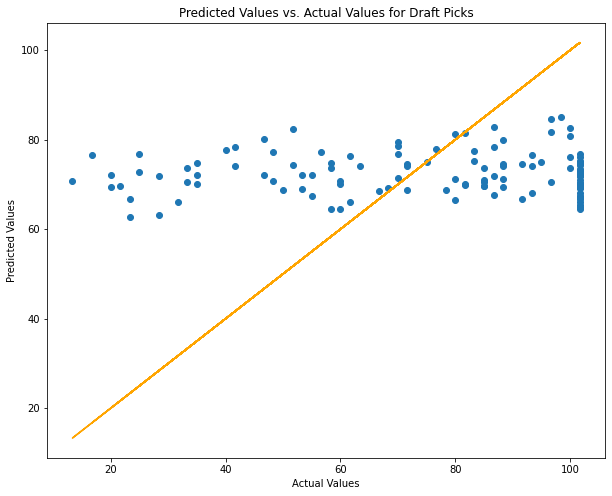

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Predicted Values vs. Actual Values for Draft Picks", fontsize=12)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color="Orange")
plt.show()

By plotting the predicted draft pick data from the linear regression model against the actual values from the dataset in the y_test variable we can see how closely the predicted values are to the actual values. If the predictions are accurate, the plot points should follow the trend line.

However, as you can see the values does not follow the trend line very well.

# Conclusion
### Comments on Analysis

Based on the results from our model, it is clear that it's difficult to correlate players' attributes with their overall draft pick. The only attribute that seems to have a decent correlation with a higher draft pick would the number of points scored by a player but even that was not definitive. It seems there is more to a player's value than just their physical characteristics, country of origin, basket position, or even the amount of points scored.

There are also other metrics we could have used from this dataset to determine draft pick order with the most notable being other gameplay statistics. Although we did include points scored in our regression model this maybe be a biased estimator because every point scored is not created equal. If a player can score points in the early game but can not score during the late game then they maybe not be valuable as someone who scores low but can make baskets during high-pressure moments. Any game statistics can not fully accompanist encompass the value of a player. In the end, with the attributes we chose, we can not confidently state that those attributes contribute to a player's overall position in the draft.

Although attributes like height, weight, country of origin or even points scored might seem like strong factors on the surface, they do not correlate closely with players who are the top draft picks. Therefore, rather than focusing on a player's physical attributes we maybe should focus more on their gameplay strategy and value to the drafted team to get a better insight into why the a players are chosen for the top draft picks.


### External Resource for Basketball 

If you would like to learn more about the NBA draft and statistics please visit the links below:
<br />
[Basketball Statistics Explained](https://www.breakthroughbasketball.com/stats/definitions.html) <br />
[Starting point for Basketball Statistics](http://vishub.org/officedocs/18024.pdf)
